In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import HW4_utils_data as utils
from scipy.optimize import minimize

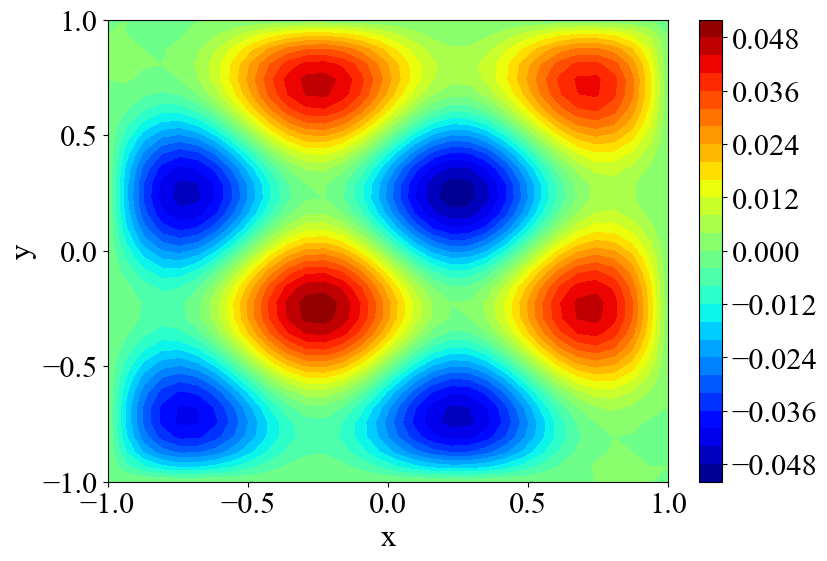

In [2]:
np.random.seed(2)

nx = 32                            # number of points in the x direction
ny = 32                            # number of points in the y direction
xmin, xmax = -1, 1                  # limits in the x direction
ymin, ymax = -1, 1                  # limits in the y direction
dx = (xmax - xmin) / (nx-1)         # grid spacing in the x direction
dy = (ymax - ymin) / (ny-1)         # grid spacing in the y direction

# Create the gridline locations and the mesh grid;
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(x, y, indexing='ij')

# Compute the rhs
b = np.sin(2*np.pi*X)+np.sin(2*np.pi*Y)               # Source field 
b[0, :] = b[-1, :] = b[:, 0] = b[:, -1] = 0     

u0 = np.empty((nx, ny))
u0[0, :] = u0[-1, :] = u0[:, 0] = u0[:, -1] = 0     

u_plus_1 = u0 

max_it = 20000
alpha = 1

for it in range(max_it):
    # print('Iteration-{}'.format(it))
    u = u_plus_1 
    u_plus_1 = utils.jacobi(alpha, u, b, dx=dx, dy=dy)

# %%
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 22
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

fig1 = plt.figure(figsize=(8,6), dpi=100)

plt.contourf(X, Y, u_plus_1, cmap='jet', levels=32)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(fraction=0.046)


In [3]:
u_plus_1.shape

(32, 32)

In [ ]:
n = 32

def neg_log_likelihood(params):
    print(params)
    varx, vary, lenx, leny, var_e = params
    X, Y, u = x, y, u_plus_1
    X = X.reshape((n,1))
    Y = Y.reshape((n,1))
    Kx = X - X.T
    Ky = Y - Y.T
    Kx = varx*np.exp(-Kx**2/(2*lenx**2))
    Ky = vary*np.exp(-Ky**2/(2*leny**2))
    K = Kx*Ky

    try:        
        C_N = K + np.eye(n)*var_e
        L = np.linalg.cholesky(C_N)
        alpha = np.linalg.solve(L.T, np.linalg.solve(L, u))
        log_likelihood = n*0.5*np.log(2*np.pi) + np.sum(np.log(np.diag(L))) + 0.5*(u.T@alpha)
    except np.linalg.LinAlgError:
        log_likelihood = np.inf
        
    return log_likelihood

initial_params = [1,1,1,1]

result = minimize(neg_log_likelihood, initial_params, bounds=[(1e-18, None), (1e-18, None), (1e-18, None), (1e-18, None)])
theta1, theta2, theta3, var_e = result.x
print(result.fun)